# Cardiovascular Disease dataset


Data description There are 3 types of input features:

Objective: factual information; 
Examination: results of medical examination; 
Subjective: information given by the patient. Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men
Systolic blood pressure | Examination Feature | ap_hi | int | 
Diastolic blood pressure | Examination Feature | ap_lo | int | 
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | 
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | 
Smoking | Subjective Feature | smoke | binary | 
Alcohol intake | Subjective Feature | alco | binary | 
Physical activity | Subjective Feature | active | binary | 
Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 
All of the dataset values were collected at the moment of medical examination.

In [1]:
# Importing the required libraries.

import pandas as pd
import numpy as np
# visualization imports

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
#laoding data
df = pd.read_csv('./downloads/cardio_train.txt.csv' , sep=';')

In [3]:
# Let us now begin first with finding some quick descriptive stats about our data.
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [4]:
df.shape

(70000, 13)

In [5]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
len(df)

70000

In [7]:
#lets view some basic statistcs

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#get the correlation of the columns 

df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [9]:
df.info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       

In [10]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

# Exploratory data analysis(EDA)

In [11]:
# Identifying missing values.

df.isnull().head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

From the above we can see that we do not have any missing values into our dataset

In [13]:
# Checking for any duplicate values in dataset
df.duplicated().values.any()

False

In [14]:
#Lets drop id since it does not provide any additional information

del df['id'] 

In [15]:
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [16]:
df.shape

(70000, 12)

In [17]:
print(f'{df.dtypes.value_counts()}')

int64      11
float64     1
dtype: int64


In [18]:
df['age'].head(2)

0    18393
1    20228
Name: age, dtype: int64

In [19]:
#Converting age into accurate values

df['age'] = round(df['age'] / 365)

In [20]:
print(df.age.min())
df.age.max()

30.0


65.0

Age: Age is looking normal for youngest to be 30 and oldest to be 65.

In [21]:
df['age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 70000, dtype: float64

females =  45530
males =  24470


/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

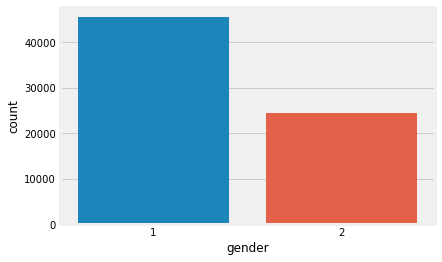

In [22]:
# how many males and females in our dataset?

print("females = ",df[df['gender']==1].shape[0])
print("males = ",df[df['gender']==2].shape[0])
sns.countplot(df['gender'])


In [23]:
print(df.weight.min())
df.weight.max()

10.0


200.0

Weight: Weight of 10kg already tell us there is outlier.

/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of weight')

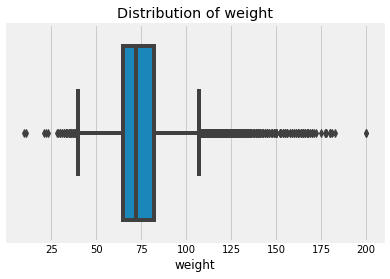

In [24]:
sns.boxplot(df['weight']);
plt.title('Distribution of weight')

In [25]:
# remove weight outliers

Minweight_outlierMask = df['weight'] > df['weight'].quantile(0.005)
Maxweight_outlierMask = df['weight'] < df['weight'].quantile(0.999)
df = df[(Minweight_outlierMask) & (Maxweight_outlierMask)]

/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


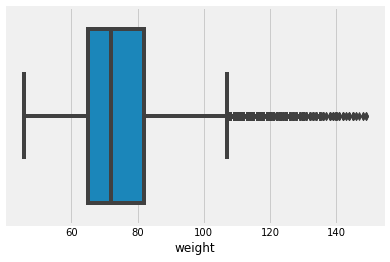

In [26]:
sns.boxplot(df['weight']);

In [27]:
# min & max weight after removing the outlier

print(df.weight.min())
df.weight.max()

45.8


149.0

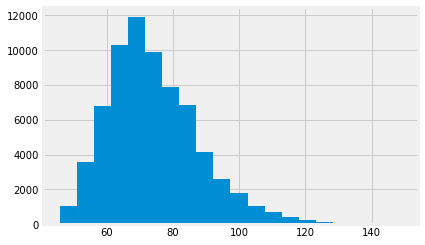

In [28]:
df['weight'].hist(bins=20);

In [29]:
print(df.height.min())
df.height.max()

55


250

Height: Height of 55 and 250 isn’t normal.

/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


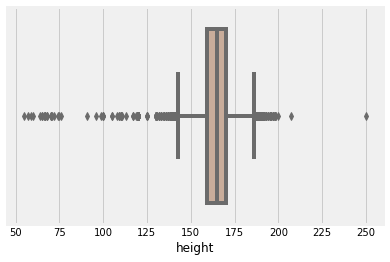

In [30]:
sns.boxplot(df['height'],palette='pink');

In [31]:
df[df['height'] < 125]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,60.0,2,76,55.0,120,80,1,1,0,0,1,0
3420,40.0,1,100,70.0,100,70,1,1,0,0,1,0
3735,48.0,1,120,70.0,120,70,1,1,0,0,1,0
4212,44.0,1,120,80.0,120,80,1,1,0,0,1,0
6821,59.0,2,120,80.0,140,80,2,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65302,51.0,1,99,60.0,90,60,1,1,0,0,1,0
66023,40.0,1,120,80.0,120,70,2,1,0,0,1,0
66479,46.0,2,110,90.0,110,90,1,1,0,0,1,0
66643,52.0,1,57,61.0,130,90,1,1,0,0,1,1


In [32]:
df = df[df['height'] >= 125]

In [33]:
df[df['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,58.0,1,250,86.0,140,100,3,1,0,0,1,1
21628,52.0,2,207,78.0,100,70,1,1,0,1,1,0


In [34]:
df.drop(index=6486, inplace= True)

/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


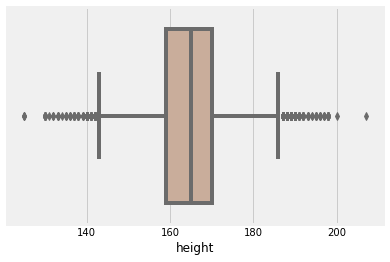

In [35]:
sns.boxplot(df['height'],palette='pink');

In [36]:
print(df.height.min())
df.height.max()

125


207

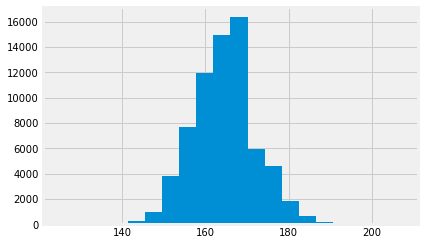

In [37]:
df['height'].hist(bins=20);

In [38]:
df.shape

(69425, 12)

In [39]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [40]:
# Fact: Diastolic blood pressure cannot be haigher than systolic blood pressure 

print("Diastilic pressure is higher than systolic one in {0} cases".format
      (df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1223 cases


In [41]:
df.drop(df[df['ap_lo']>df['ap_hi']].index,inplace=True)

In [42]:
df.shape

(68202, 12)

In [43]:
print(df.ap_hi.min())
df.ap_hi.max()

12


16020

In [44]:
df = df[df['ap_hi'] > 80]
df = df[df['ap_lo'] > 50]

In [45]:
# remove any ap_hi an ap_lo readings that are abnormally high
df = df[df['ap_hi'] < 250]

In [46]:
df[df['ap_lo'] > 150]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4781,52.0,1,158,74.0,200,170,1,1,0,0,1,1
4981,62.0,2,173,74.0,220,160,2,2,0,0,1,1
38022,60.0,1,161,84.0,196,182,2,2,0,0,1,1
43998,62.0,2,163,70.0,200,180,1,1,0,0,0,1
54987,53.0,1,169,80.0,200,160,3,3,0,0,1,0


In [47]:
print(df.ap_lo.min())
df.ap_lo.max()

52


182

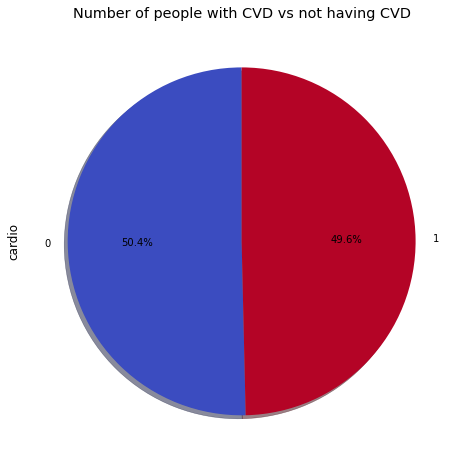

In [48]:
#How many people in this dataset have Cardiovascular Disease ?

df['cardio'].value_counts().plot.pie(figsize=(8, 8), autopct='%1.1f%%' ,shadow=True ,cmap='coolwarm',  startangle=90)
plt.title("Number of people with CVD vs not having CVD")
plt.show()

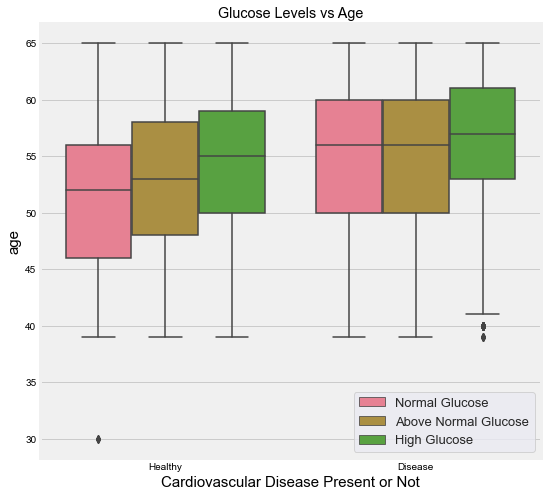

In [49]:
plt.figure(figsize=(8, 8))
plt.title('Glucose Levels vs Age')

sns.set(style="dark", palette="husl", color_codes=True)

sns.boxplot(x="cardio", y="age", hue="gluc", data=df)

L = plt.legend(loc='lower right', prop={'size':13})

L.get_texts()[0].set_text('Normal Glucose')
L.get_texts()[1].set_text('Above Normal Glucose')
L.get_texts()[2].set_text('High Glucose')

plt.ylabel('age', size=15)
plt.xlabel('Cardiovascular Disease Present or Not', size=15)

plt.xticks([0, 1], ['Healthy', 'Disease'])
plt.show()

In [50]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


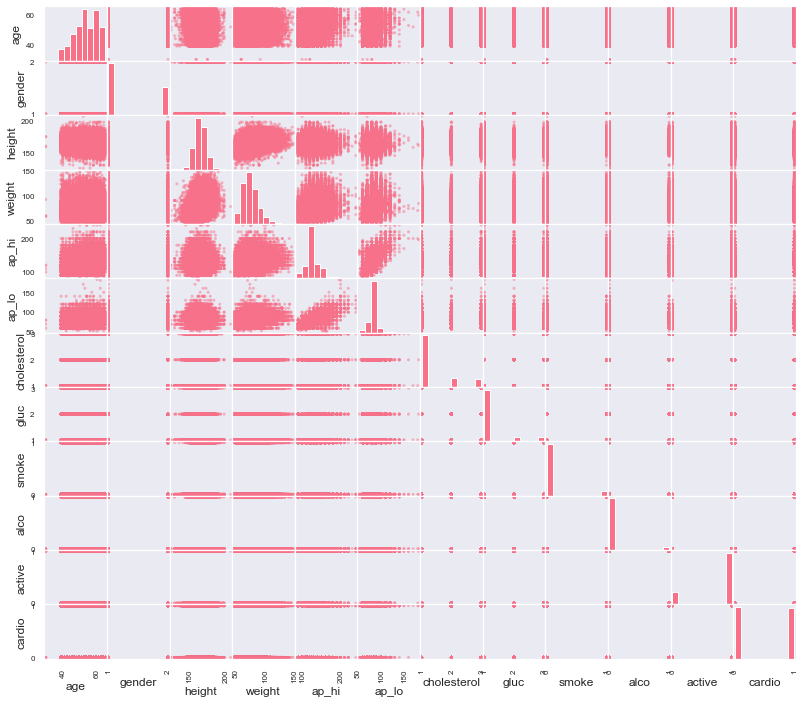

In [51]:
# scatter matrix to visualize data
pd.plotting.scatter_matrix(df ,figsize = [12,12]);

<AxesSubplot:>

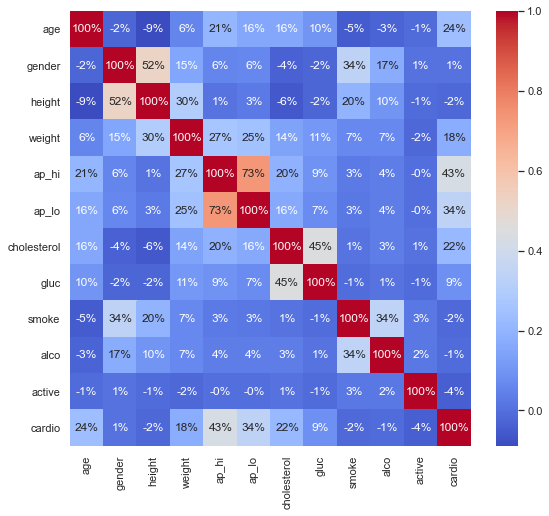

In [52]:
#fmt='.3f'
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.0%',cmap='coolwarm')

Looking into the correlation heatmap, and it seems like our target has higher correlation with ap_hi, ap_lo ,age,
weight,cholestrol. Some variables have higher correlation between each other.

<ipython-input-53-ad8b2a37e67e>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=[0,1],height=activity_percentage, yerr=activity_percentage.std(),color='rb',tick_label=["non-active", "active"])


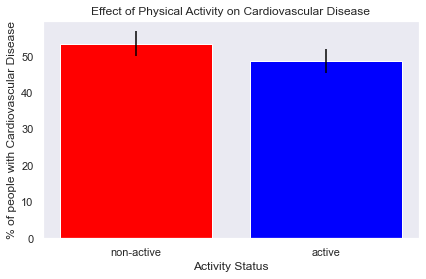

In [53]:
# Does Physicial activity have a protective effect against Cardiovascular Disease?

activity_group = df.groupby(['active'], as_index=False)
activity_count = activity_group.count()['cardio']
activity_sum = activity_group.sum()['cardio']
activity_percentage = activity_sum / activity_count * 100

plt.bar(x=[0,1],height=activity_percentage, yerr=activity_percentage.std(),color='rb',tick_label=["non-active", "active"])
plt.title("Effect of Physical Activity on Cardiovascular Disease")
plt.ylabel("% of people with Cardiovascular Disease")
plt.xlabel("Activity Status")
plt.show()

Not surpising here that active people which have lower CVD rates.

# Model

In [54]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [55]:
#split the data into 80% training data set and 20% testing data set 

from sklearn.model_selection import train_test_split
x=df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y=df['cardio']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 )

In [56]:
X_train.shape , y_train.shape

((54393, 11), (54393,))

In [57]:
X_test.shape , y_test.shape

((13599, 11), (13599,))

In [58]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
21618,54.0,1,154,72.0,130,80,3,3,0,0,1
10794,49.0,1,150,101.0,130,80,3,3,1,0,1
62851,50.0,2,170,68.0,120,80,1,1,0,0,0
36247,46.0,1,160,74.0,110,70,1,1,0,0,1
22129,51.0,2,169,80.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
41581,61.0,1,158,71.0,130,80,2,1,0,0,1
54503,64.0,1,172,76.0,130,80,3,1,0,0,1
16404,56.0,2,172,92.0,150,100,2,1,0,0,1
5208,52.0,2,169,78.0,140,80,1,1,0,0,0


In [59]:
y_test

40881    1
37683    1
19166    0
64202    0
56751    1
        ..
2473     1
28937    1
8768     0
54289    1
61129    0
Name: cardio, Length: 13599, dtype: int64

In [60]:
lr =LogisticRegression(C=100)
lr.fit(X_train, y_train)

/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [61]:
# accuracy on training and testing
print("the training accuracy is:",lr.score(X_train , y_train))
print("the testing accuracy is:",lr.score(X_test , y_test))


the training accuracy is: 0.7160112514477965
the testing accuracy is: 0.709831605265093


In [62]:
from sklearn.model_selection import GridSearchCV

grid={"C":[0.001,0.01,1,10,100],
      "penalty":["l1","l2"]}

log_cv=GridSearchCV(LogisticRegression(),grid,cv=10)
log_cv.fit(X_train,y_train)


/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/thamr/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/thamr/opt/anac

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [68]:
print("tuned hpyerparameters :(best parameters) ",log_cv.best_params_)
print("accuracy :",log_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.7167653547905648


In [69]:
y_pred=log_cv.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred ,target_names=["cvd","no cvd"]))

              precision    recall  f1-score   support

         cvd       0.70      0.76      0.73      6841
      no cvd       0.74      0.66      0.70      6758

    accuracy                           0.71     13599
   macro avg       0.72      0.71      0.71     13599
weighted avg       0.72      0.71      0.71     13599



In [71]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[5232, 1609],
       [2291, 4467]])

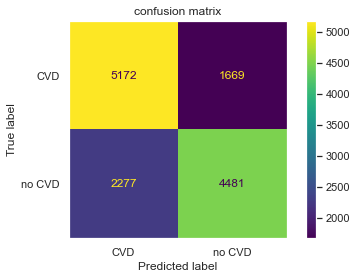

In [72]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X_test, y_test,display_labels=["CVD","no CVD"])
plt.title('confusion matrix')
plt.show() 

In [73]:
y_train.unique()

array([1, 0])

In [74]:
for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    knn.score(X_test, y_test)
    scores = cross_val_score(knn ,x,y , cv=10 , scoring='accuracy')
    print("k=",k,"The result is",scores.mean())

k= 1 The result is 0.6311772254570308
k= 2 The result is 0.6343393859823677
k= 3 The result is 0.6703731149909589
k= 4 The result is 0.6730350743621467
k= 5 The result is 0.6867572912971631
k= 6 The result is 0.689992948790047
k= 7 The result is 0.696787853750119
k= 8 The result is 0.6991852305269806
k= 9 The result is 0.7032150619035672


In [76]:
from sklearn.model_selection import GridSearchCV
grid_params={
'n_neighbors': [10,4,19,200],
'weights': ['uniform','distance'],
'metric' :['euclidean', 'manhattan']
    
}
kgs = GridSearchCV(KNeighborsClassifier(),grid_params,
    verbose=1,
    cv=3,
    n_jobs =-1 )
kgs_results = kgs.fit(X_train, y_train)
kgs.cv_results_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'mean_fit_time': array([2.19024658, 1.59437807, 1.44220487, 1.05688834, 0.90750106,
        0.96645713, 0.98812445, 0.87633475, 1.07048106, 1.34400535,
        0.99610837, 0.98107855, 0.89102062, 0.86387459, 0.89160705,
        0.88005463]),
 'std_fit_time': array([0.01520639, 0.53644745, 0.47306773, 0.03984196, 0.08114661,
        0.03898028, 0.13508913, 0.02692479, 0.05105008, 0.2446094 ,
        0.05291461, 0.06522927, 0.10720636, 0.04283927, 0.07333712,
        0.06356329]),
 'mean_score_time': array([ 3.86891739,  3.00891964,  3.21939143,  2.04734262,  4.19937356,
         3.1461401 , 10.52149765,  9.74805164,  5.0550607 ,  4.14982327,
         4.18784197,  3.09346565,  6.03422737,  5.154538  , 15.73748136,
        10.61327998]),
 'std_score_time': array([0.04771899, 0.36049031, 0.15672351, 0.05251699, 0.11868834,
        0.09154327, 0.14349983, 0.12512065, 0.1176595 , 0.1136055 ,
        0.09782184, 0.0479108 , 0.10753954, 0.0916173 , 0.34462486,
        2.89287973]),
 'param_me

In [77]:
df1=pd.DataFrame(kgs.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.190247,0.015206,3.868917,0.047719,euclidean,10,uniform,"{'metric': 'euclidean', 'n_neighbors': 10, 'we...",0.705146,0.712426,0.706139,0.707904,0.003224,10
1,1.594378,0.536447,3.008920,0.360490,euclidean,10,distance,"{'metric': 'euclidean', 'n_neighbors': 10, 'we...",0.697369,0.702223,0.696818,0.698803,0.002428,12
2,1.442205,0.473068,3.219391,0.156724,euclidean,4,uniform,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei...",0.674921,0.675859,0.673432,0.674738,0.000999,14
3,1.056888,0.039842,2.047343,0.052517,euclidean,4,distance,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei...",0.671998,0.671502,0.667531,0.670344,0.001999,16
4,0.907501,0.081147,4.199374,0.118688,euclidean,19,uniform,"{'metric': 'euclidean', 'n_neighbors': 19, 'we...",0.714632,0.716177,0.716894,0.715901,0.000944,6
5,0.966457,0.038980,3.146140,0.091543,euclidean,19,distance,"{'metric': 'euclidean', 'n_neighbors': 19, 'we...",0.705587,0.708731,0.710055,0.708124,0.001874,9
6,0.988124,0.135089,10.521498,0.143500,euclidean,200,uniform,"{'metric': 'euclidean', 'n_neighbors': 200, 'w...",0.720203,0.726546,0.722354,0.723034,0.002634,2
7,0.876335,0.026925,9.748052,0.125121,euclidean,200,distance,"{'metric': 'euclidean', 'n_neighbors': 200, 'w...",0.712537,0.718769,0.717280,0.716195,0.002657,5
8,1.070481,0.051050,5.055061,0.117659,manhattan,10,uniform,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",0.707297,0.710220,0.707518,0.708345,0.001329,8
9,1.344005,0.244609,4.149823,0.113605,manhattan,10,distance,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",0.700292,0.701064,0.697424,0.699594,0.001566,11


In [78]:
df1[['mean_test_score']]

,mean_test_score
0,0.707904
1,0.698803
2,0.674738
3,0.670344
4,0.715901
5,0.708124
6,0.723034
7,0.716195
8,0.708345
9,0.699594


In [79]:
kgs.best_score_

0.7238982957365837

In [80]:
y_predk=kgs.predict(X_test)

In [81]:
print(classification_report(y_test,y_predk ,target_names=["cvd","no cvd"]))

              precision    recall  f1-score   support

         cvd       0.70      0.78      0.74      6841
      no cvd       0.75      0.65      0.70      6758

    accuracy                           0.72     13599
   macro avg       0.72      0.72      0.72     13599
weighted avg       0.72      0.72      0.72     13599



In [82]:
dt= DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)
scores = cross_val_score(dt ,x,y , cv=10 , scoring='accuracy')
scores.mean()

0.729232791586998

In [83]:
param_dist={'criterion':['gini','entropy'],
            'max_depth': [2,5,10,20]
     }

In [85]:
griddt=GridSearchCV(DecisionTreeClassifier(), param_dist , cv=5 , n_jobs=-1)
griddt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20]})

In [86]:
griddt.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [87]:
griddt.best_score_

0.7303330416865011

In [90]:
y_predd=griddt.predict(X_test)

In [91]:
print(classification_report(y_test,y_predd ,target_names=["cvd","no cvd"]))

              precision    recall  f1-score   support

         cvd       0.69      0.82      0.75      6841
      no cvd       0.77      0.63      0.69      6758

    accuracy                           0.72     13599
   macro avg       0.73      0.72      0.72     13599
weighted avg       0.73      0.72      0.72     13599



In [92]:
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
scores = cross_val_score(rf ,x,y , cv=10 , scoring='accuracy')
scores.mean()

0.7152606308886255

In [93]:
param_grid = {'max_depth': [50, 60],
    'max_features': [3, 4],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [6, 7],
    'n_estimators': [50, 100]}
rgs=GridSearchCV(RandomForestClassifier(),param_grid,verbose=1)
rgs.fit(X_train,y_train)
rgs.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'max_depth': 60,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}

In [94]:
df2=pd.DataFrame(rgs.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.952768,0.130268,0.148449,0.015361,50,3,2,6,50,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.725526,0.726354,0.728008,0.724674,0.730465,0.727005,0.002051,23
1,3.709425,0.135582,0.288983,0.025915,50,3,2,6,100,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.724791,0.728376,0.729938,0.724582,0.731476,0.727833,0.002751,19
2,1.894453,0.105502,0.137602,0.006565,50,3,2,7,50,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.727365,0.727273,0.727824,0.725593,0.731844,0.727980,0.002075,18
3,3.791606,0.298357,0.293922,0.042357,50,3,2,7,100,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.728743,0.727916,0.730490,0.725961,0.732488,0.729120,0.002227,11
4,1.697268,0.034481,0.127599,0.004042,50,3,3,6,50,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.726813,0.730030,0.733523,0.728351,0.733407,0.730425,0.002683,3
5,3.436178,0.193315,0.257222,0.025263,50,3,3,6,100,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.727457,0.731501,0.728743,0.730097,0.733958,0.730351,0.002252,5
6,1.674052,0.020753,0.127010,0.002445,50,3,3,7,50,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.725710,0.729019,0.731133,0.729638,0.736532,0.730407,0.003539,4
7,3.348048,0.044985,0.247466,0.004233,50,3,3,7,100,"{'max_depth': 50, 'max_features': 3, 'min_samp...",0.727640,0.731409,0.729479,0.727707,0.733775,0.730002,0.002338,9
8,2.172746,0.023576,0.144094,0.007138,50,4,2,6,50,"{'max_depth': 50, 'max_features': 4, 'min_samp...",0.720287,0.722585,0.720746,0.721824,0.726788,0.722446,0.002316,32
9,4.235545,0.056872,0.271972,0.003708,50,4,2,6,100,"{'max_depth': 50, 'max_features': 4, 'min_samp...",0.722677,0.724699,0.726537,0.725225,0.726880,0.725204,0.001499,26


In [96]:
df2[['mean_test_score']]

,mean_test_score
0,0.727005
1,0.727833
2,0.727980
3,0.729120
4,0.730425
5,0.730351
6,0.730407
7,0.730002
8,0.722446
9,0.725204


In [107]:
rgs.best_score_

0.7314728286705753

In [108]:
y_predr=rgs.predict(X_test)

In [109]:
print(classification_report(y_test,y_predr ,target_names=["cvd","no cvd"]))

              precision    recall  f1-score   support

         cvd       0.71      0.76      0.74      6841
      no cvd       0.74      0.69      0.71      6758

    accuracy                           0.73     13599
   macro avg       0.73      0.73      0.72     13599
weighted avg       0.73      0.73      0.73     13599



By using GridSearchCV we have increased accuracy of this model from 71% to 73%

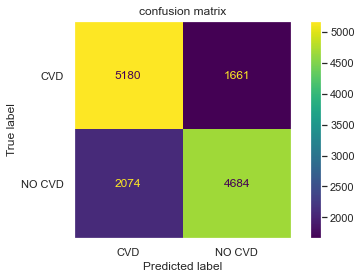

In [111]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rgs,X_test, y_test,display_labels=["CVD","NO CVD"])
plt.title('confusion matrix')
plt.show() 

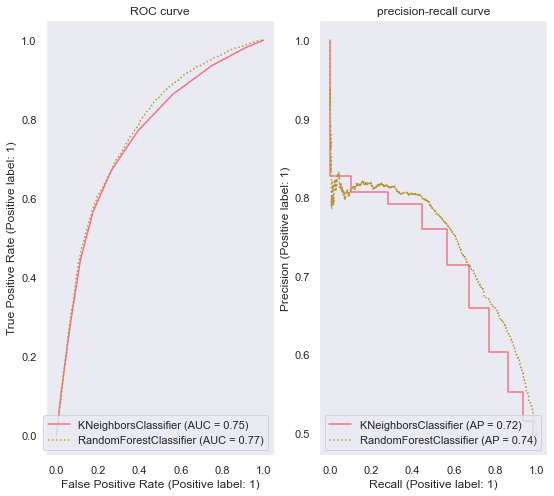

In [99]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8),sharex=True)

plot_roc_curve(knn, X_test, y_test,ax=ax1)
plot_roc_curve(rf, X_test, y_test,ax=ax1,linestyle=':')
plot_precision_recall_curve(knn, X_test, y_test,ax=ax2)
plot_precision_recall_curve(rf, X_test, y_test,ax=ax2,linestyle=':')
ax1.set_title('ROC curve')
ax2.set_title('precision-recall curve')
plt.show()

In [100]:
mlp= MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)
scores = cross_val_score(mlp ,x,y , cv=10 , scoring='accuracy')
scores.mean()

0.7140105681631381

In [101]:
GRID = {'learning_rate':  ["constant", "adaptive"],
    'hidden_layer_sizes': [(10,),(30,)],
    'solver': ['sgd','adam'],
    'alpha': [0.0001, 0.05],
    'activation': ['tanh', 'relu']}


In [102]:
gmlp=GridSearchCV(MLPClassifier(),GRID, n_jobs=-1)
gmlp.fit(X_train,y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10,), (30,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [103]:
gmlp.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (30,),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}

In [104]:
gmlp.best_score_

0.7180704914635292

In [105]:
y_predm=gmlp.predict(X_test)

In [106]:
print(classification_report(y_test,y_predm ,target_names=["cvd","no cvd"]))

              precision    recall  f1-score   support

         cvd       0.70      0.76      0.73      6841
      no cvd       0.73      0.66      0.70      6758

    accuracy                           0.71     13599
   macro avg       0.71      0.71      0.71     13599
weighted avg       0.71      0.71      0.71     13599



In [ ]:
# End 